In [ ]:
# https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc/data

In [ ]:
# algorithm

# randomforestclassifier
# decisiontreeclassifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier ,plot_tree , export_text
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
approval=pd.read_csv('E:/python/decision_tree/bank_customer_for_bankloan_dataset.csv')
approval.shape

(5000, 14)

In [5]:
approval.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
approval.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP.Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal.Loan            2
Securities.Account       2
CD.Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
approval.drop('ID',axis=1,inplace=True)

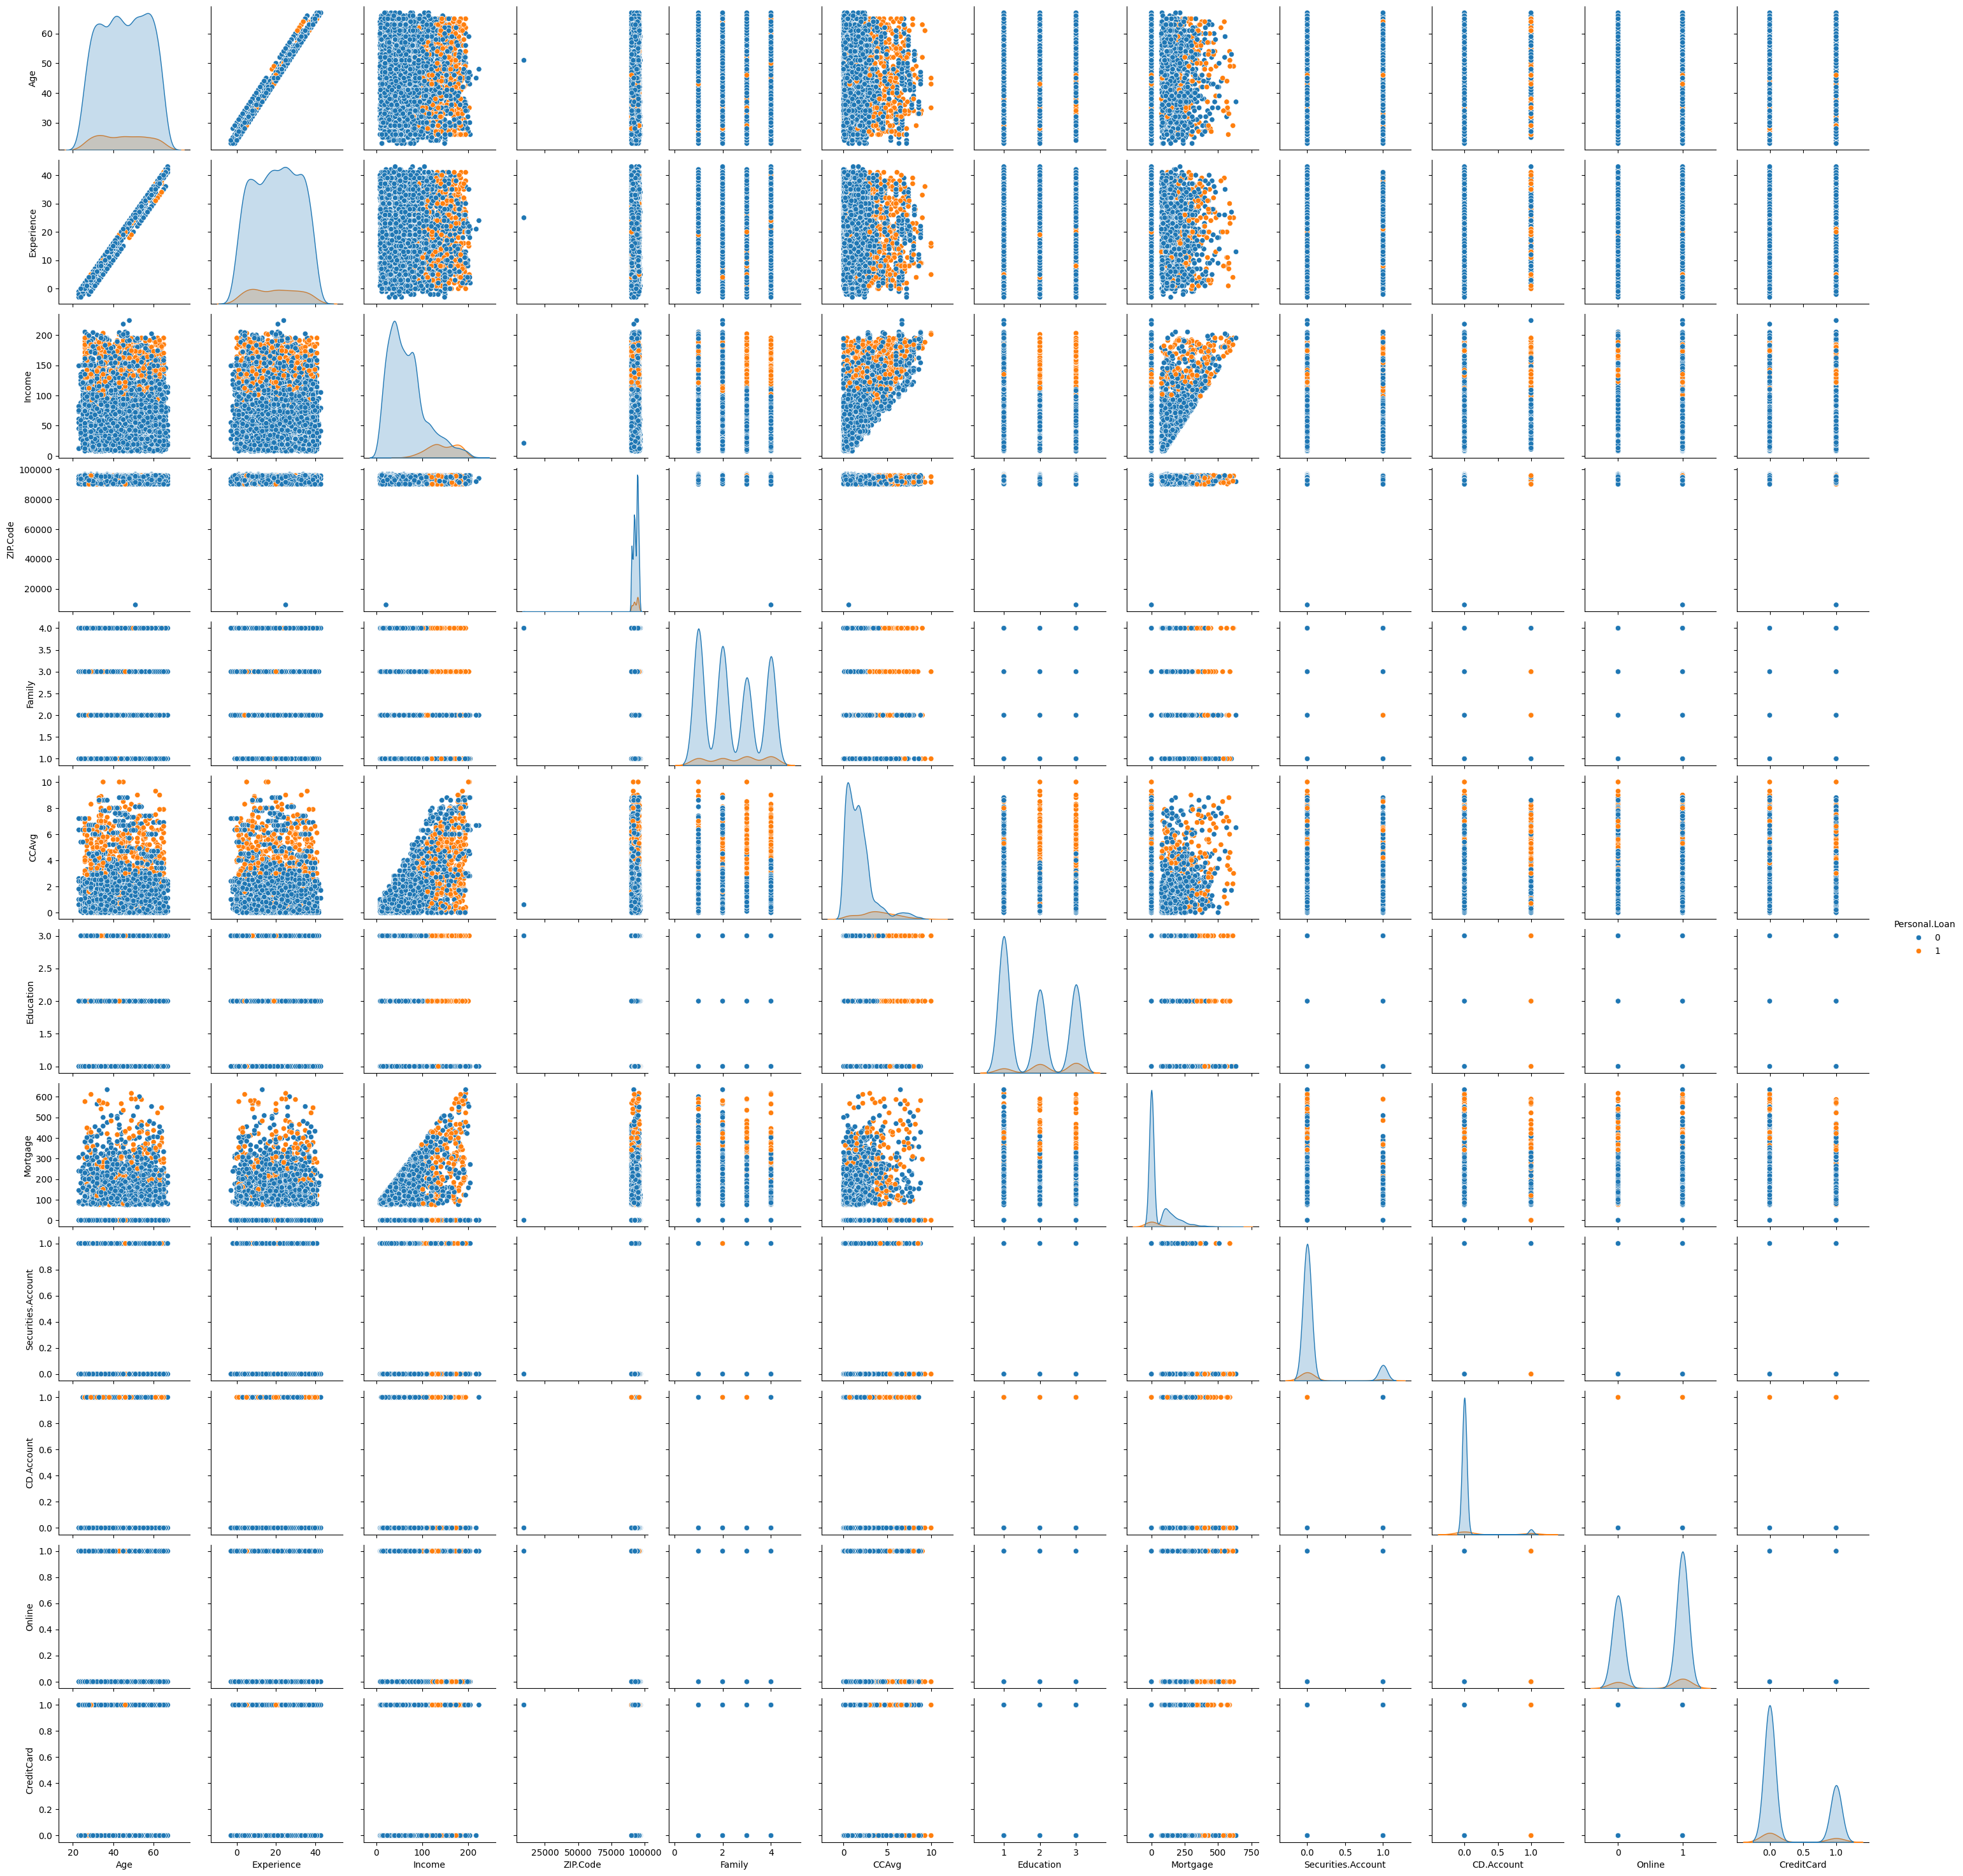

In [12]:
plt.Figure(figsize=[100,100])
sns.pairplot(data=approval,hue='Personal.Loan')
plt.show()

In [15]:
approval.columns

Index(['Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [69]:
X=approval[['Age', 'Income', 'Family', 'CCAvg', 'Education', 'CD.Account']]
y=approval['Personal.Loan']

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3750, 6), (1250, 6), (3750,), (1250,))

In [71]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9848

In [72]:
model.get_depth()

12

In [73]:
model.feature_importances_

array([0.03349883, 0.53365683, 0.11933979, 0.12574755, 0.1745575 ,
       0.0131995 ])

In [74]:
X.columns[model.feature_importances_>0]

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'CD.Account'], dtype='object')

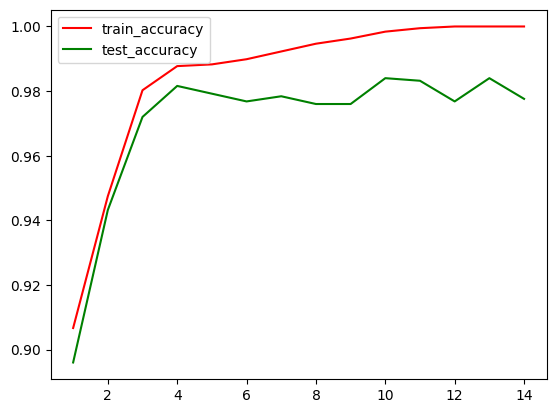

In [75]:
train_accuracy=[]
test_accuracy=[]
for d in range(1,15):
    model=DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

plt.plot(range(1,15),train_accuracy,c='red',label='train_accuracy')  
plt.plot(range(1,15),test_accuracy,c='green',label='test_accuracy')  
plt.legend()
plt.show()

In [81]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9776

In [82]:
model.feature_importances_


array([0.03273879, 0.54150024, 0.11927892, 0.11697355, 0.17618587,
       0.01332263])

In [83]:
X.columns[model.feature_importances_>0]

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'CD.Account'], dtype='object')

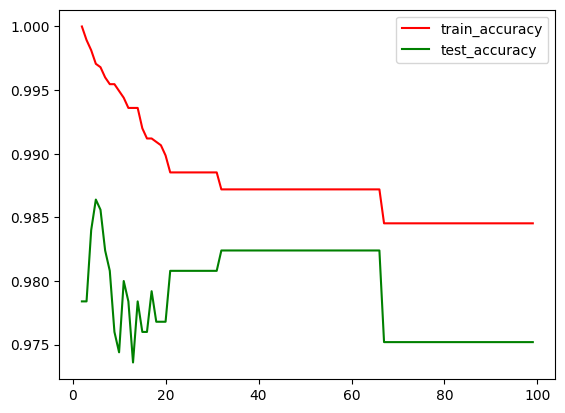

In [114]:
train_accuracy=[]
test_accuracy=[]
for s in range(2,100):
    model=DecisionTreeClassifier(criterion='entropy',min_samples_split=s)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

plt.plot(range(2,100),train_accuracy,c='red',label='train_accuracy')  
plt.plot(range(2,100),test_accuracy,c='green',label='test_accuracy')  
plt.legend()
plt.show()

In [115]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=4)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9776

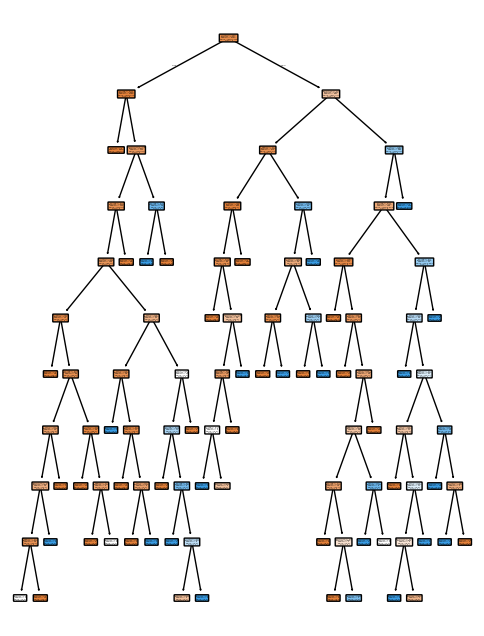

In [118]:
plt.figure(figsize=[6,8])
plot_tree(model,feature_names=X.columns,class_names=[str(cls) for cls in model.classes_],rounded=True,filled=True)
plt.show()


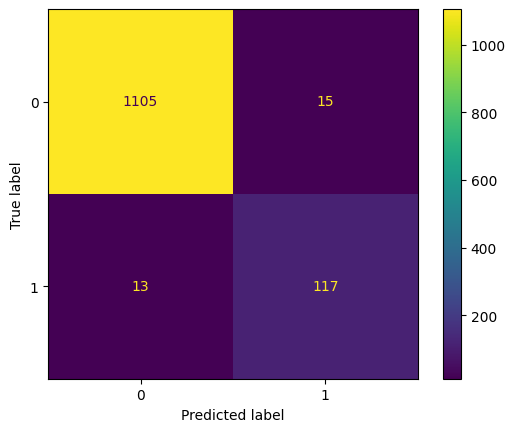

In [120]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [121]:
model.score(X_test,y_test)

0.9776